### Requirements

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Functions 

In [50]:
def color_hist(image):
    """
    Calculates the color histogram of an input image.

    Input image as a NumPy array. Returns a flattened color histogram of the input image.
    """
    hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0,256, 0,256, 0,256]) # calculates the color histogram of the image

    hist = cv2.normalize(hist, hist, 0, 1.0, cv2.NORM_MINMAX) # min/max normalizes the histogram

    hist = hist.flatten() # flattens the histogram

    return(hist)

def hist_similarity(hist1, hist2):
    """
    Calculates the similarity between two color histograms using the Chi-Squared distance metric. 
    Takes two color histograms as input
    """

    return round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

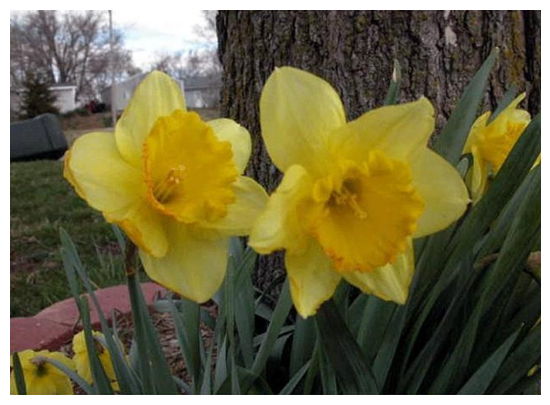

In [51]:
# path to the "Flowers" folder
input_folder = (".." "/in/flowers")
output_folder = (".." "/out/")

# My chosen picture is number 1 of daffodils
target_image_path = os.path.join(input_folder, "image_0001.jpg")
target_image = cv2.imread(target_image_path)
show(target_image)

## Main Pipeline

In [52]:
similar_images = [] # creating a list to store the similarity metric

# calculate the color histogram of the chosen picture
target_hist = color_hist(target_image)

for imagefile in os.listdir(input_folder):
    if imagefile != "image_0001.jpg": #excluding the chosen picture from the loop
        image_path = os.path.join(input_folder, imagefile)
        image = cv2.imread(image_path)
        image_hist = color_hist(image) # calculating the color histogram for the picture
        similarity = hist_similarity(target_hist, image_hist) # comparing the color histogram to the chosen picture
        similar_images.append((imagefile, similarity)) # appending the picture filename and the similarity score to the list

similar_images.sort(key = lambda rank: rank[1]) # sorting by the second element in the tuple (by using lambda and [1], so that it is the similarity score that is sorted

top_five = similar_images[:5] # ranking the top five most similar pictures

### Sanity Check

[('image_0773.jpg', 190.14), ('image_1316.jpg', 190.22), ('image_0740.jpg', 190.63), ('image_1078.jpg', 191.69), ('image_0319.jpg', 191.88)]


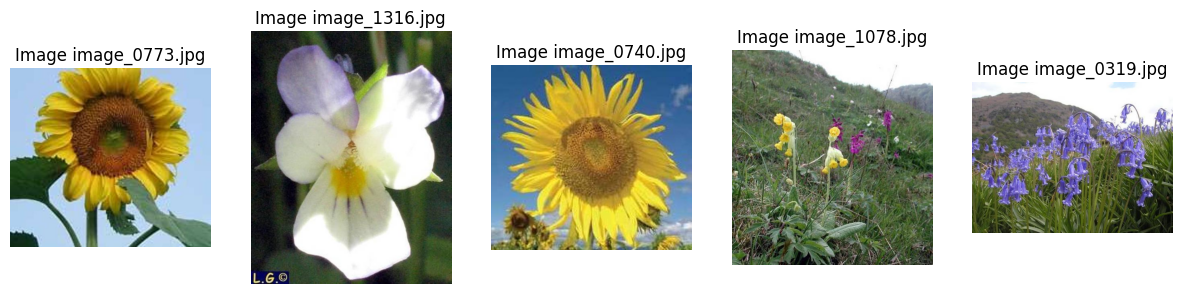

In [53]:
print(top_five) # printing the list of most similar pictures

# sanity checking the calculations by making a plot of the 5 most similar pictures
plt.figure(figsize=(15, 10))
for i, (filename, _) in enumerate(top_five, start=1):
    image_path = os.path.join(input_folder, filename)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i)
    plt.imshow(image_rgb)
    plt.title(f"Image {filename}")
    plt.axis("off")

plt.show() # My approach to rating image similarity based on color histogram distribution is obviously quite flawed, as none of the top five most similar pictures are daffodils; showcasing that this might not be the most appropiate method. 

In [54]:
# Save results to CSV
output_csv_path = os.path.join(output_folder, "similar_images.csv")
with open(output_csv_path, "w") as f:
    f.write("Filename,Distance\n")
    f.write(f"CHOSEN PICTURE: image_0001.jpg,0.0\n")
    for filename, distance in top_five:
        f.write(f"{filename},{distance}\n")

print("CSV file saved with similar images.")

CSV file saved with similar images.
